In [1]:
%matplotlib inline
import os
from glob import glob
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from scipy import ndimage
from skimage import feature

In [2]:
import os
import sys
module_path = os.path.abspath('../src')
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

/Users/ilya/Documents/machine_learning/kaggle_data-science-bowl-2018/code/src


In [3]:
TRAIN_PATH = '../../input/stage1_train/'
TEST_PATH = '../../input/stage1_test/'

In [4]:
train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

print(len(train_ids), len(test_ids))

670 65


In [5]:
def paths(img_id, path, type_):
    masks_root = os.path.join(path, img_id, type_, '*')+'.png'
    
    return glob(masks_root)

def mask_paths(img_id, path):
    return paths(img_id, path, 'masks')

def img_paths(img_id, path):
    return paths(img_id, path, 'images')[0]

index = 4
masks = mask_paths(train_ids[index], TRAIN_PATH)
image = imread(img_paths(train_ids[index], TRAIN_PATH))

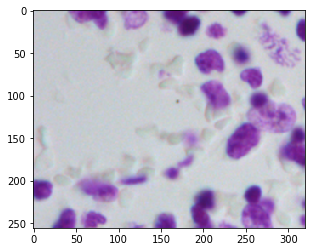

In [6]:
plt.imshow(image)

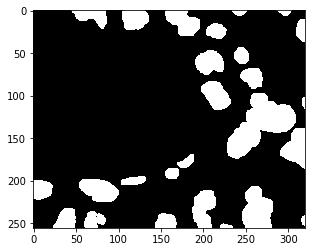

In [6]:
def concat_mask(masks):
    return np.sum(np.stack([imread(mask) for mask in masks], 0), 0)

mask = concat_mask(masks)
plt.imshow(mask, cmap='gray')

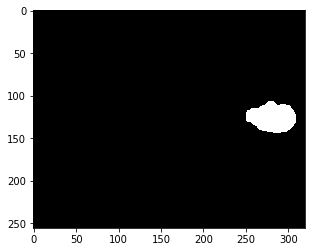

In [8]:
im = imread(masks[6])
plt.imshow(im, cmap='gray')

In [9]:
im.shape

(256, 320)

(40, 75)


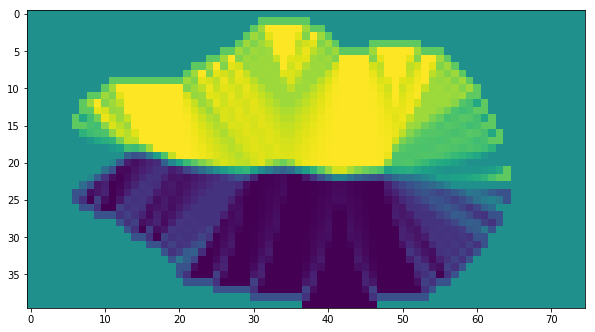

In [12]:
plt.figure(figsize=(10,15))
dist = ndimage.distance_transform_edt(im[105:145,245:])
print(dist.shape)
# plt.imshow(dist)
u,v = np.gradient(dist)
plt.imshow(u)

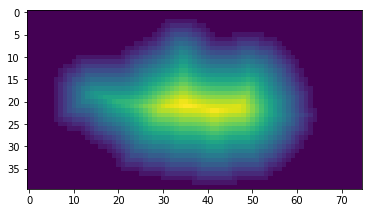

In [101]:
plt.imshow(dist)

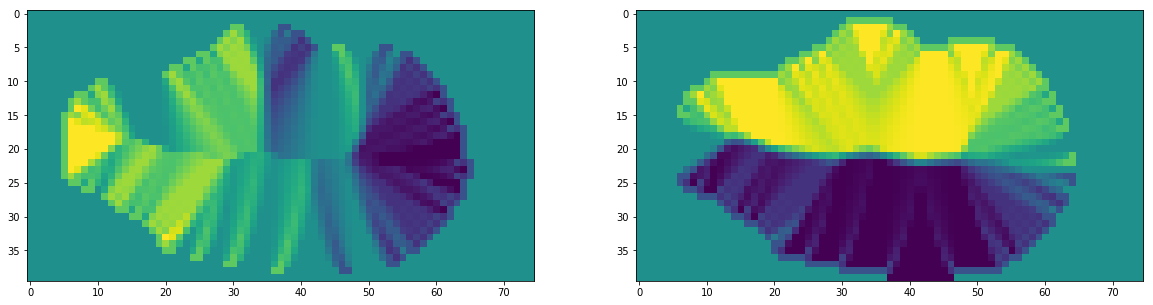

In [159]:
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(grad[1])
plt.subplot(222)
plt.imshow(grad[0])

In [11]:
grad.shape

AttributeError: 'list' object has no attribute 'shape'

In [167]:
def loss(pred, gt):
    angles = np.arccos(np.sum(pred*gt, axis=2))
    return np.sum(angles*angles)

In [169]:
g = np.array(grad).reshape(40,75,2) / 8
loss(g, g)

7326.663838232135

In [175]:
loss(g, np.zeros(g.shape))

7402.20330081702